In [20]:
!pip install yfinance beautifulsoup4 selenium pandas matplotlib
!apt-get update
!apt install chromium-chromedriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading


Question 1: Extract Tesla Stock Data Using yfinance


In [21]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index and display first 5 rows
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Question 2: Extract Tesla Revenue Data Using Selenium

In [23]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Define the Tesla revenue URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send a request with headers to prevent blocking
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Parse the page content
soup = BeautifulSoup(response.text, "html.parser")

# Find the revenue table
tables = soup.find_all("table")

# If no tables found, print an error message
if len(tables) == 0:
    print("No tables found. The website structure may have changed.")

# Extract the correct table (try index 1 or 0)
tesla_revenue = pd.read_html(str(tables[1]))[0]

# Clean the DataFrame
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("[\$,]", "", regex=True).astype(float)

# Display the last 5 rows
print(tesla_revenue.tail())

          Date  Revenue
58  2010-06-30     28.0
59  2010-03-31     21.0
60  2009-12-31      NaN
61  2009-09-30     46.0
62  2009-06-30     27.0


<ipython-input-23-1d9379d59ac1>:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[1]))[0]


Question 3: Extract GameStop Stock Data Using yfinance

In [25]:
import yfinance as yf

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Question 4: Extract GameStop Revenue Data Using Selenium

In [27]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Define the GameStop revenue URL
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a request with headers to avoid blocking
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Parse the page content
soup = BeautifulSoup(response.text, "html.parser")

# Find the revenue table
tables = soup.find_all("table")

# If no tables found, print an error message
if len(tables) == 0:
    print("No tables found. The website structure may have changed.")

# Extract the correct table (try index 1 or 0)
gme_revenue = pd.read_html(str(tables[1]))[0]

# Clean the DataFrame
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("[\$,]", "", regex=True).astype(float)

# Display the last 5 rows
print(gme_revenue.tail())

          Date  Revenue
59  2010-01-31   3524.0
60  2009-10-31   1835.0
61  2009-07-31   1739.0
62  2009-04-30   1981.0
63  2009-01-31   3492.0


<ipython-input-27-2b50eafdb2ca>:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[1]))[0]


Question 5: Plot Tesla Stock and Revenue Dashboard

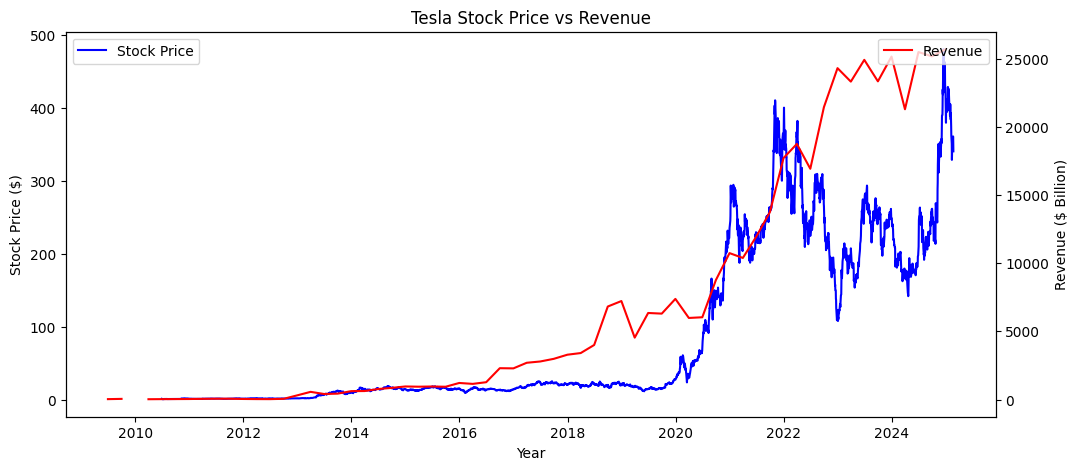

In [28]:
import matplotlib.pyplot as plt

# Convert revenue date column to datetime format
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Function to create graphs
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plot stock price
    ax1.plot(stock_data["Date"], stock_data["Close"], label="Stock Price", color="blue")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Stock Price ($)")
    ax1.legend(loc="upper left")

    # Plot revenue on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], label="Revenue", color="red")
    ax2.set_ylabel("Revenue ($ Billion)")
    ax2.legend(loc="upper right")

    plt.title(title)
    plt.show()

# Plot Tesla stock vs revenue
make_graph(tesla_data, tesla_revenue, "Tesla Stock Price vs Revenue")

Question 6: Plot GameStop Stock and Revenue Dashboard

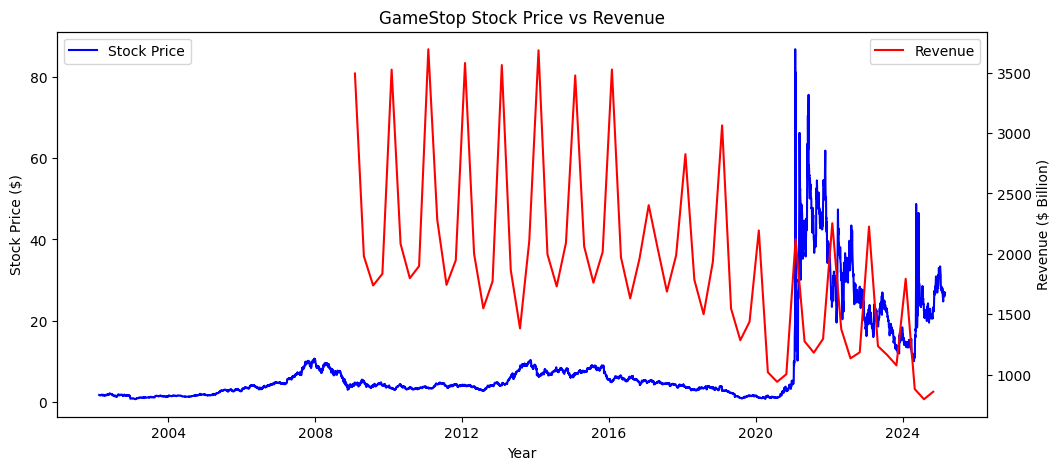

In [29]:
# Convert revenue date column to datetime format
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_data["Date"] = pd.to_datetime(gme_data["Date"])

# Plot GameStop stock vs revenue
make_graph(gme_data, gme_revenue, "GameStop Stock Price vs Revenue")